In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/BankChurners-1.csv'

Mounted at /content/drive


Using Logistic Regression,Decision Tree,Random
Forest,AdaBoost,Gradient Boosting and XGBoost,I created a
classification model to predict which customer will leave the
bank and close their account.I compared these models’ accuracy
and XGBoost turned out to be the best one

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
import scipy.stats
from statistics import mode
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.utils import resample

Q1)A)

In [ ]:
df=pd.read_csv(path)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Q1)B)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
df[df.duplicated()]
#No duplicate records

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


Q1)C)

In [ ]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Q1)D)

In [ ]:
for i in df.columns:
  print(df[i].value_counts)

<bound method IndexOpsMixin.value_counts of 0        768805383
1        818770008
2        713982108
3        769911858
4        709106358
           ...    
10122    772366833
10123    710638233
10124    716506083
10125    717406983
10126    714337233
Name: CLIENTNUM, Length: 10127, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0        Existing Customer
1        Existing Customer
2        Existing Customer
3        Existing Customer
4        Existing Customer
               ...        
10122    Existing Customer
10123    Attrited Customer
10124    Attrited Customer
10125    Attrited Customer
10126    Attrited Customer
Name: Attrition_Flag, Length: 10127, dtype: object>
<bound method IndexOpsMixin.value_counts of 0        45
1        49
2        51
3        40
4        40
         ..
10122    50
10123    41
10124    44
10125    30
10126    43
Name: Customer_Age, Length: 10127, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0        M
1        F
2        M
3     

Q1)E)

In [ ]:
missing=df.isnull().sum().apply(lambda x:(x/df.shape[0])*100)
missing

CLIENTNUM                    0.000000
Attrition_Flag               0.000000
Customer_Age                 0.000000
Gender                       0.000000
Dependent_count              0.000000
Education_Level             14.999506
Marital_Status               7.396070
Income_Category              0.000000
Card_Category                0.000000
Months_on_book               0.000000
Total_Relationship_Count     0.000000
Months_Inactive_12_mon       0.000000
Contacts_Count_12_mon        0.000000
Credit_Limit                 0.000000
Total_Revolving_Bal          0.000000
Avg_Open_To_Buy              0.000000
Total_Amt_Chng_Q4_Q1         0.000000
Total_Trans_Amt              0.000000
Total_Trans_Ct               0.000000
Total_Ct_Chng_Q4_Q1          0.000000
Avg_Utilization_Ratio        0.000000
dtype: float64

Q2)A)

In [ ]:
df=df.drop('CLIENTNUM',axis=1)

Q2)B)

In [ ]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
df['Attrition_Flag'].replace('Existing Customer',0,inplace=True)
df['Attrition_Flag'].replace('Attrited Customer',1,inplace=True)
df['Attrition_Flag']=df['Attrition_Flag'].astype('int')

Q3)A

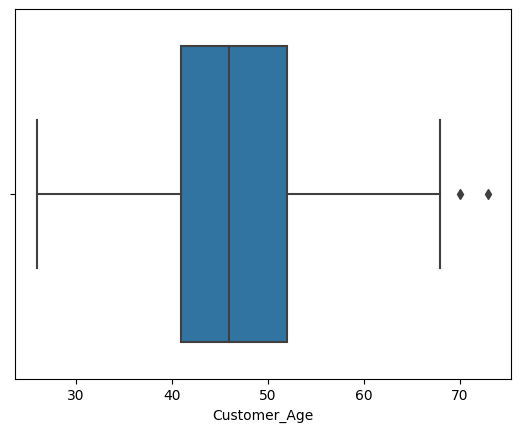

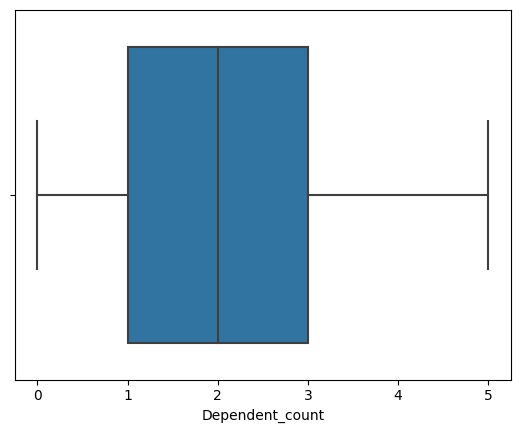

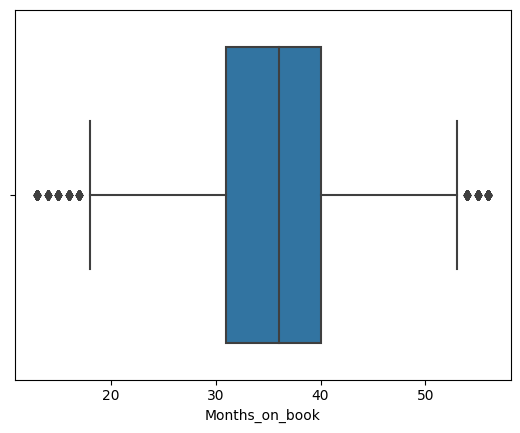

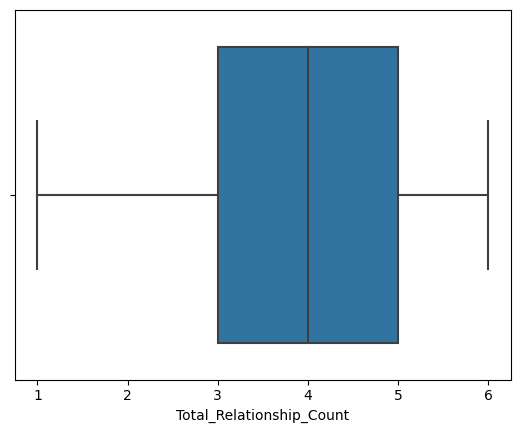

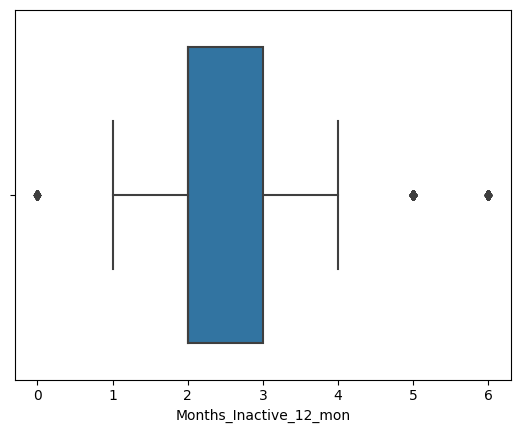

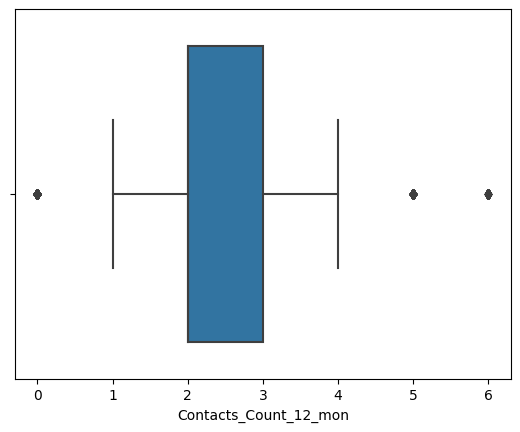

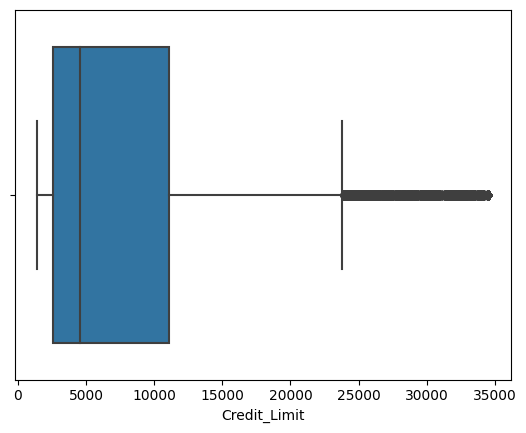

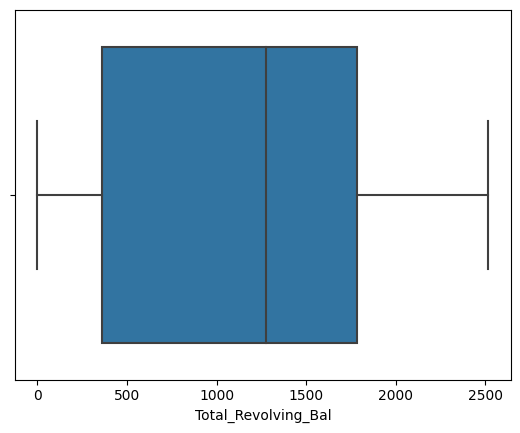

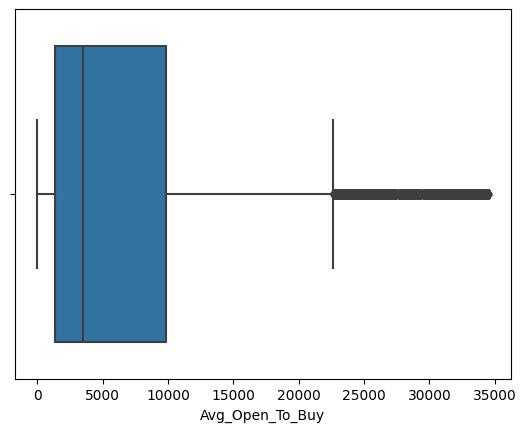

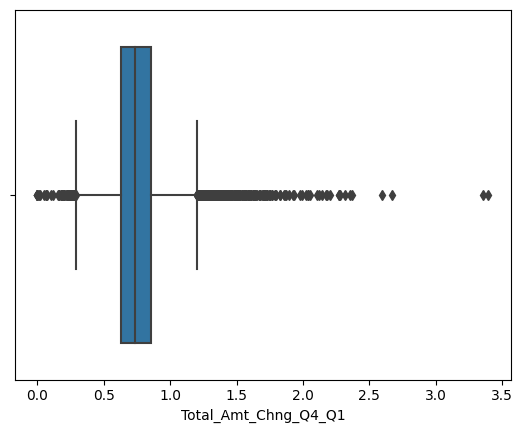

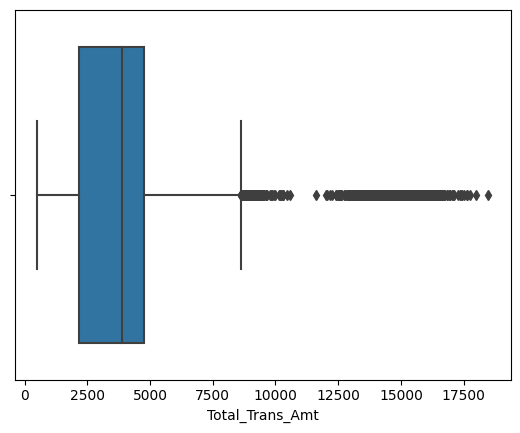

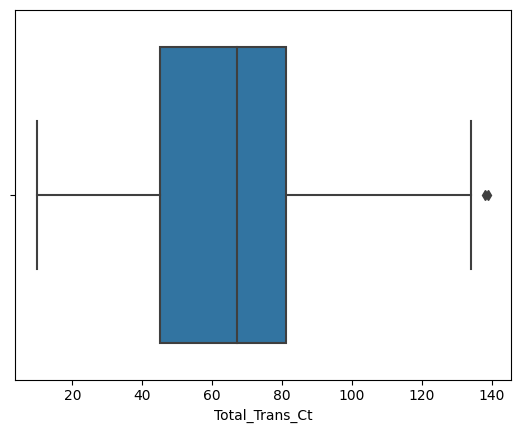

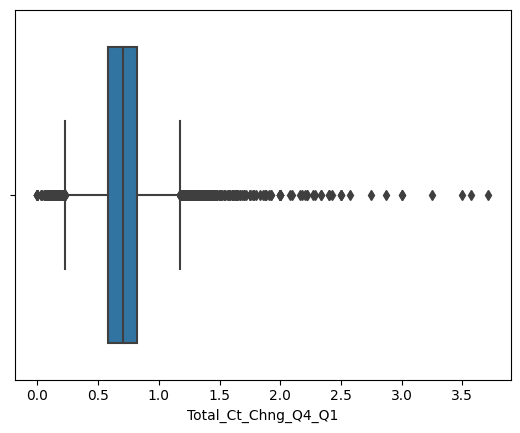

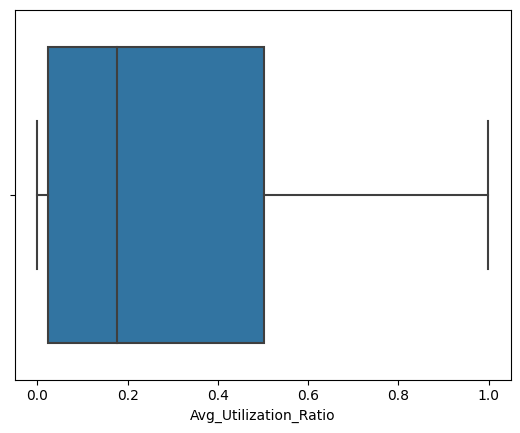

In [ ]:
df_numeric=df.select_dtypes(include='number')
df_numeric=df_numeric.drop('Attrition_Flag',axis=1)
df_categorical=df.select_dtypes(exclude='number')
for i in df_numeric.columns:
  sns.boxplot(data=df_numeric,x=df_numeric[i])
  plt.show()
#All features have outliers except Total_Relationship_Count,Avg_Utilization_Utility,Total_Revolving_Bal,Dependent_Count

Q4)A)

In [ ]:
def count_outliers(column_name):
  q1=df[column_name].quantile(0.25)
  q3=df[column_name].quantile(0.75)
  iqr=q3-q1
  upper_lim=q3+(1.5*iqr)
  lower_lim=q1-(1.5*iqr)
  count=0
  for i in df[column_name]:
    if i<lower_lim or i>upper_lim:
      count+=1
  percentage=(count/df.shape[0])*100
  print(column_name," ",percentage)
print("Outlier Percentages:")
for i in df_numeric.columns:
  count_outliers(i)

Outlier Percentages:
Customer_Age   0.019749185346104474
Dependent_count   0.0
Months_on_book   3.8115927717981632
Total_Relationship_Count   0.0
Months_Inactive_12_mon   3.2684901747802906
Contacts_Count_12_mon   6.211118791349857
Credit_Limit   9.7165991902834
Total_Revolving_Bal   0.0
Avg_Open_To_Buy   9.509232744149305
Total_Amt_Chng_Q4_Q1   3.9103386985286854
Total_Trans_Amt   8.847635035054804
Total_Trans_Ct   0.019749185346104474
Total_Ct_Chng_Q4_Q1   3.890589513182581
Avg_Utilization_Ratio   0.0


Q4)B)

In [ ]:
df['Income_Category'].replace('abc',np.nan,inplace=True)

Q4)C)

In [ ]:
X=df.copy()
X=X.drop('Attrition_Flag',axis=1)
y=df['Attrition_Flag']

Q5)A)

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

Q5)B)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)

Q6)A)

In [ ]:
X_train.isnull().sum()

Customer_Age                  0
Gender                        0
Dependent_count               0
Education_Level             928
Marital_Status              457
Income_Category             654
Card_Category                 0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                  0
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Amt_Chng_Q4_Q1          0
Total_Trans_Amt               0
Total_Trans_Ct                0
Total_Ct_Chng_Q4_Q1           0
Avg_Utilization_Ratio         0
dtype: int64

In [ ]:
X_train['Education_Level'].fillna(mode(X_train['Education_Level']),inplace=True)
X_train['Marital_Status'].fillna(mode(X_train['Marital_Status']),inplace=True)
X_train['Income_Category'].fillna(mode(X_train['Income_Category']),inplace=True)

In [ ]:
X_test.isnull().sum()

Customer_Age                  0
Gender                        0
Dependent_count               0
Education_Level             297
Marital_Status              152
Income_Category             237
Card_Category                 0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                  0
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Amt_Chng_Q4_Q1          0
Total_Trans_Amt               0
Total_Trans_Ct                0
Total_Ct_Chng_Q4_Q1           0
Avg_Utilization_Ratio         0
dtype: int64

In [ ]:
X_test['Education_Level'].fillna(mode(X_test['Education_Level']),inplace=True)
X_test['Marital_Status'].fillna(mode(X_test['Marital_Status']),inplace=True)
X_test['Income_Category'].fillna(mode(X_test['Income_Category']),inplace=True)

In [ ]:
X_val.isnull().sum()

Customer_Age                  0
Gender                        0
Dependent_count               0
Education_Level             294
Marital_Status              140
Income_Category             221
Card_Category                 0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                  0
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Amt_Chng_Q4_Q1          0
Total_Trans_Amt               0
Total_Trans_Ct                0
Total_Ct_Chng_Q4_Q1           0
Avg_Utilization_Ratio         0
dtype: int64

In [ ]:
X_val['Education_Level'].fillna(mode(X_val['Education_Level']),inplace=True)
X_val['Marital_Status'].fillna(mode(X_val['Marital_Status']),inplace=True)
X_val['Income_Category'].fillna(mode(X_val['Income_Category']),inplace=True)

Q7)A)

In [ ]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
X_val=pd.get_dummies(X_val,drop_first=True)

Q8)A)

In [ ]:
for i in np.arange(0.1,1.0,0.05):
  model_DT=DecisionTreeClassifier(random_state=42,ccp_alpha=i).fit(X_train,y_train)
  y_pred_DT=model_DT.predict(X_val)
  print("Alpha value: ",i)
  print('Accuracy: ',accuracy_score(y_val,y_pred_DT))
  print('Precision: ',precision_score(y_val,y_pred_DT))
  print('Recall: ',recall_score(y_val,y_pred_DT))
  print('ROC-AUC Score: ',roc_auc_score(y_val,y_pred_DT))

Alpha value:  0.1
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5
Alpha value:  0.15000000000000002
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5
Alpha value:  0.20000000000000004
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.25000000000000006
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5
Alpha value:  0.30000000000000004
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5
Alpha value:  0.3500000000000001
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.40000000000000013
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5
Alpha value:  0.45000000000000007
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5
Alpha value:  0.5000000000000001
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.5500000000000002
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5
Alpha value:  0.6000000000000002
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5
Alpha value:  0.6500000000000001
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.7000000000000002
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5
Alpha value:  0.7500000000000002
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5
Alpha value:  0.8000000000000002
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.8500000000000002
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5
Alpha value:  0.9000000000000002
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5
Alpha value:  0.9500000000000003
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
for i in np.arange(0.1,1.0,0.05):
  model_DT=RandomForestClassifier(random_state=42,ccp_alpha=i,oob_score=True).fit(X_train,y_train)
  y_pred_DT=model_DT.predict(X_val)
  print("Alpha value: ",i)
  print('Accuracy: ',accuracy_score(y_val,y_pred_DT))
  print('Precision: ',precision_score(y_val,y_pred_DT))
  print('Recall: ',recall_score(y_val,y_pred_DT))
  print('ROC-AUC Score: ',roc_auc_score(y_val,y_pred_DT))

Alpha value:  0.1
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.15000000000000002
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.20000000000000004
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.25000000000000006
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.30000000000000004
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.3500000000000001
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.40000000000000013
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.45000000000000007
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.5000000000000001
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.5500000000000002
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.6000000000000002
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.6500000000000001
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.7000000000000002
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.7500000000000002
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.8000000000000002
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.8500000000000002
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.9000000000000002
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.9500000000000003
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
for i in np.arange(0.1,1.0,0.05):
  model_DT=GradientBoostingClassifier(random_state=42,ccp_alpha=i).fit(X_train,y_train)
  y_pred_DT=model_DT.predict(X_val)
  print("Alpha value: ",i)
  print('Accuracy: ',accuracy_score(y_val,y_pred_DT))
  print('Precision: ',precision_score(y_val,y_pred_DT))
  print('Recall: ',recall_score(y_val,y_pred_DT))
  print('ROC-AUC Score: ',roc_auc_score(y_val,y_pred_DT))

Alpha value:  0.1
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.15000000000000002
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.20000000000000004
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.25000000000000006
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.30000000000000004
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.3500000000000001
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.40000000000000013
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.45000000000000007
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.5000000000000001
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.5500000000000002
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.6000000000000002
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.6500000000000001
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.7000000000000002
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.7500000000000002
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.8000000000000002
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.8500000000000002
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.9000000000000002
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Alpha value:  0.9500000000000003
Accuracy:  0.8390918065153011
Precision:  0.0
Recall:  0.0
ROC-AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
for i in np.arange(0.1,1.0,0.05):
  model_DT=XGBClassifier(base_score=0.5, booster='gbtree',
        learning_rate=i,
        reg_alpha=0,
       ).fit(X_train,y_train)
  y_pred_DT=model_DT.predict(X_val)
  print("Learning Rate: ",i)
  print('Accuracy: ',accuracy_score(y_val,y_pred_DT))
  print('Precision: ',precision_score(y_val,y_pred_DT))
  print('Recall: ',recall_score(y_val,y_pred_DT))
  print('ROC-AUC Score: ',roc_auc_score(y_val,y_pred_DT))
#Maximum Recall is 90.8%

Learning Rate:  0.1
Accuracy:  0.9713721618953604
Precision:  0.932258064516129
Recall:  0.8865030674846626
ROC-AUC Score:  0.937075063154096
Learning Rate:  0.15000000000000002
Accuracy:  0.972852912142152
Precision:  0.9356913183279743
Recall:  0.8926380368098159
ROC-AUC Score:  0.9404366654637315
Learning Rate:  0.20000000000000004
Accuracy:  0.9689042448173741
Precision:  0.9228295819935691
Recall:  0.8803680981595092
ROC-AUC Score:  0.9331252255503427
Learning Rate:  0.25000000000000006
Accuracy:  0.9703849950641659
Precision:  0.9235668789808917
Recall:  0.8895705521472392
ROC-AUC Score:  0.9377264525442078
Learning Rate:  0.30000000000000004
Accuracy:  0.9693978282329714
Precision:  0.9230769230769231
Recall:  0.8834355828220859
ROC-AUC Score:  0.9346589678816312
Learning Rate:  0.3500000000000001
Accuracy:  0.9713721618953604
Precision:  0.932258064516129
Recall:  0.8865030674846626
ROC-AUC Score:  0.937075063154096
Learning Rate:  0.40000000000000013
Accuracy:  0.9693978282329

In [ ]:
model_DT=LogisticRegression().fit(X_train,y_train)
y_pred_DT=model_DT.predict(X_val)
print("Learning Rate: ",i)
print('Accuracy: ',accuracy_score(y_val,y_pred_DT))
print('Precision: ',precision_score(y_val,y_pred_DT))
print('Recall: ',recall_score(y_val,y_pred_DT))
print('ROC-AUC Score: ',roc_auc_score(y_val,y_pred_DT))
#Recall is 48%

Learning Rate:  0.9500000000000003
Accuracy:  0.8958538993089832
Precision:  0.7832512315270936
Recall:  0.48773006134969327
ROC-AUC Score:  0.7309238542042584


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Q8)C)

In [ ]:
#Best model is XGBoost

Q8)E)

In [ ]:
existing=df['Attrition_Flag'][df['Attrition_Flag']=='Existing Customer']
attrited=df['Attrition_Flag'][df['Attrition_Flag']=='Attrited Customer']
downsample = resample(existing,
             replace=True,
             n_samples=len(attrited),
             random_state=42)
data_downsampled=pd.concat([downsample,attrited],axis=1)
upsample = resample(attrited,
             replace=True,
             n_samples=len(existing),
             random_state=42)
data_upsampled=pd.concat([upsample,existing],axis=1)